In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Netflix Userbase.csv")

In [3]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
# summary statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,2500.0,1250.5000,721.832160,1.0,625.75,1250.5,1875.25,2500.0
Monthly Revenue,2500.0,12.5084,1.686851,10.0,11.00,12.0,14.00,15.0
Age,2500.0,38.7956,7.171778,26.0,32.00,39.0,45.00,51.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
# count of unique value in each columns
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [7]:
#df.isnull().sum()
df.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [8]:
# groupby subscription type and calculate average monthly revenue
average_revenue_by_subscription= df.groupby("Subscription Type")["Monthly Revenue"].mean()

In [9]:
print(average_revenue_by_subscription)

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64


In [10]:
# groupby country
user_count_by_country= df.groupby("Country")["User ID"].count()

In [11]:
user_count_by_country

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64

In [12]:
median_age_by_plan_duration = df.groupby("Plan Duration")["Age"].median()

In [13]:
median_age_by_plan_duration

Plan Duration
1 Month    39.0
Name: Age, dtype: float64

In [14]:
total_revenue_by_gender = df.groupby("Gender")["Monthly Revenue"].sum()

In [15]:
total_revenue_by_gender

Gender
Female    15736
Male      15535
Name: Monthly Revenue, dtype: int64

In [16]:
average_age_by_device = df.groupby("Device")["Age"].mean()

In [17]:
average_age_by_device

Device
Laptop        39.036164
Smart TV      38.693443
Smartphone    38.726248
Tablet        38.720379
Name: Age, dtype: float64

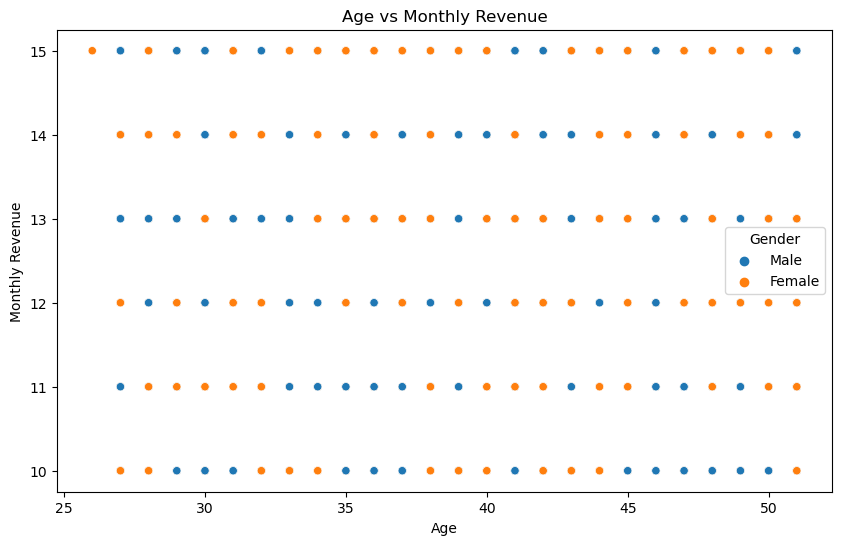

In [18]:
# Data visualisation
plt.figure(figsize= (10,6))
sns.scatterplot(x= "Age",y ="Monthly Revenue",hue= "Gender",data= df)
plt.xlabel("Age")
plt.ylabel("Monthly Revenue")
plt.title("Age vs Monthly Revenue")
plt.show()

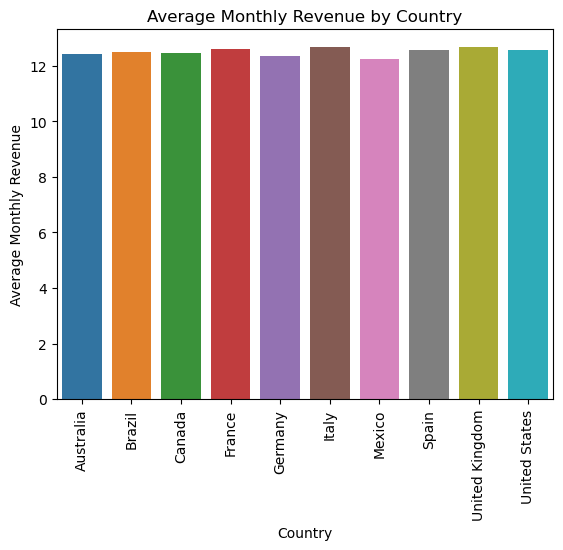

In [19]:
average_revenue_by_country = df.groupby("Country")["Monthly Revenue"].mean().reset_index()
sns.barplot(x = "Country", y = "Monthly Revenue",data= average_revenue_by_country)
plt.xlabel("Country")
plt.ylabel("Average Monthly Revenue")
plt.title("Average Monthly Revenue by Country")
plt.xticks(rotation = 90)
plt.show()

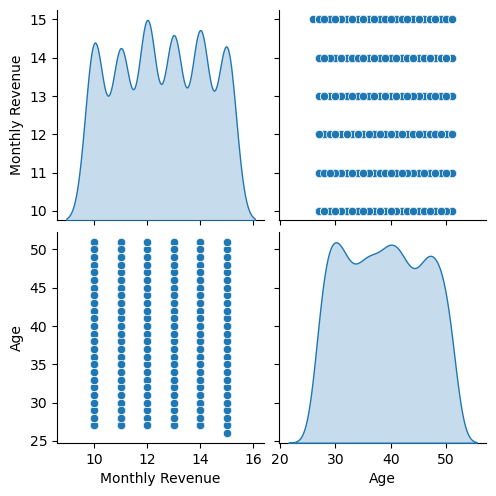

In [20]:
#relationship b/w numerical variable by using pairplot
numerical_columns =["Monthly Revenue","Age"]
sns.pairplot(df[numerical_columns],diag_kind = "kde")
plt.show()

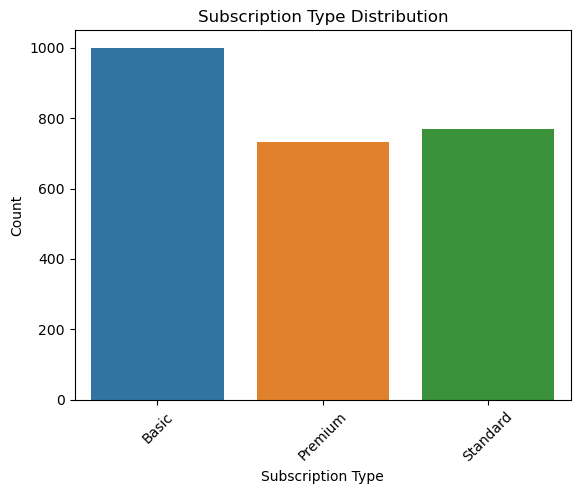

In [21]:
sns.countplot(x="Subscription Type", data= df)
plt.title("Subscription Type Distribution")
plt.xlabel("Subscription Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

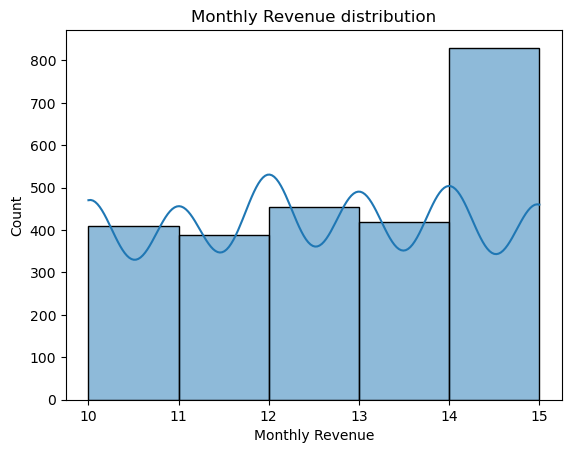

In [22]:
sns.histplot(df["Monthly Revenue"],bins=5, kde= True)
plt.title("Monthly Revenue distribution")
plt.xlabel("Monthly Revenue")
plt.ylabel("Count")
plt.show()

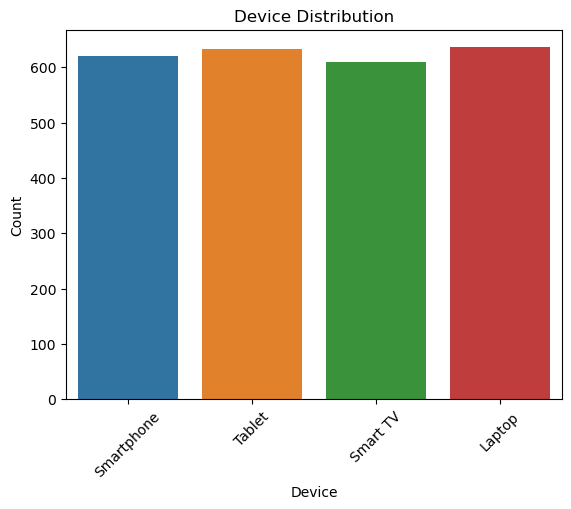

In [23]:
sns.countplot(x="Device",data= df)
plt.title("Device Distribution")
plt.xlabel("Device")
plt.ylabel("Count")
plt.xticks(rotation= 45)
plt.show()

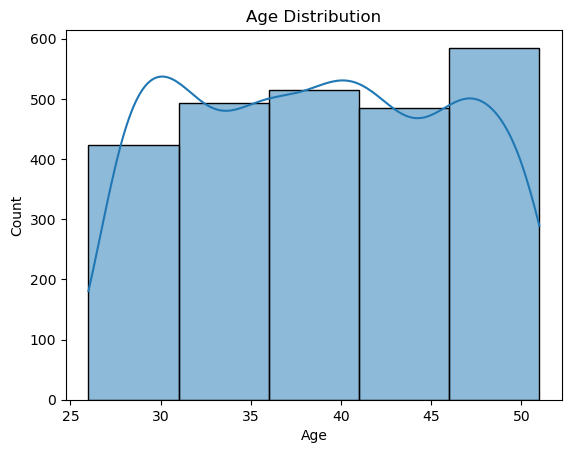

In [24]:
sns.histplot(df["Age"],bins= 5, kde= True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()